In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def from_W_to_dBW(x):
    return 10*np.log10(x)

In [3]:
def from_W_to_dBm(x):
    return 10*np.log10(x / (10 ** (-3)))

In [4]:
def from_dBW_to_W(x):
    return 10 ** (x/10)

In [5]:
def from_dBW_to_dBm(x):
    return x + 30

In [6]:
def from_dBm_to_W(x):
    return 10 ** ((x/10) - 3)

In [7]:
def from_dBm_to_dBW(x):
    return x_30

In [8]:
def Pr_to_PL(Pt, Pr):
    return 10*np.log10(Pt/Pr)

In [9]:
def PL_to_Pr(Pt, PL):
    return Pt / (10 ** (PL/10))

In [10]:
def lamb(fc):
    return 3*10**8 / fc

In [11]:
def Pr_espaco_livre(Pt, Gt, Gr, lmb, d, L = 1):
    return ( Pt*Gt*Gr*lmb**2 ) / ( (4*np.pi)**2 * d**2 * L )

In [12]:
def Pr_log_distancia(Pr_d0, d0, d, n):
    return Pr_d0*(d0/d) ** n

In [13]:
def a(hre, tipo_cidade):
    if(tipo_cidade == 0):
        a = (1.1*np.log10(fc) - 0.7)*hre - (1.56*np.log10(fc) - 0.8) 
    else:
        a = 3.2*(np.log10(11.75*hre)) ** 2 - 4.97
        
    return a

In [14]:
def PL_Hata_estendido(fc, hte, hre, d, tipo_cidade = 0):
    if(tipo_cidade == 0):
        CM = 0
    else:
        CM = 3
        
    return 46.3 + 33.9*np.log10(fc) - 13.82*np.log10(hte) - a(hre, tipo_cidade) + (44.9 - 6.55*np.log10(hte))*np.log10(d) + CM

# Dados Tarefa 3

In [15]:
# Tarefa 3
Pt = 1*10**3    # [W]
Gt = 1          # [dB]
Gr = 1          # [dB]
fc = 1800*10**6 # [Hz]
lmb = lamb(fc)  # [m]
d = np.arange(1000, 20500, 500)
Pt, Gt, Gr, fc, lmb, d, len(d)

(1000,
 1,
 1,
 1800000000,
 0.16666666666666666,
 array([ 1000,  1500,  2000,  2500,  3000,  3500,  4000,  4500,  5000,
         5500,  6000,  6500,  7000,  7500,  8000,  8500,  9000,  9500,
        10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000,
        14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500,
        19000, 19500, 20000]),
 39)

## Tarefa 3.1

In [16]:
Pr_tarefa31 = Pr_espaco_livre(Pt, Gt, Gr, lmb, d)
len(Pr_tarefa31), Pr_tarefa31

(39, array([1.75904833e-07, 7.81799256e-08, 4.39762082e-08, 2.81447732e-08,
        1.95449814e-08, 1.43595782e-08, 1.09940520e-08, 8.68665841e-09,
        7.03619331e-09, 5.81503579e-09, 4.88624535e-09, 4.16342799e-09,
        3.58989455e-09, 3.12719703e-09, 2.74851301e-09, 2.43466896e-09,
        2.17166460e-09, 1.94908402e-09, 1.75904833e-09, 1.59550869e-09,
        1.45375895e-09, 1.33009325e-09, 1.22156134e-09, 1.12579093e-09,
        1.04085700e-09, 9.65184267e-10, 8.97473636e-10, 8.36646053e-10,
        7.81799256e-10, 7.32174122e-10, 6.87128253e-10, 6.46115088e-10,
        6.08667241e-10, 5.74383127e-10, 5.42916150e-10, 5.13965910e-10,
        4.87271005e-10, 4.62603110e-10, 4.39762082e-10]))

## Tarefa 3.2

In [17]:
d0 = 1000
Pr_d0 = Pr_espaco_livre(Pt, Gt, Gr, lmb, d0)
Pr_d0

1.7590483271239196e-07

In [18]:
n = 3
Pr_tarefa32_n3 = Pr_log_distancia(Pr_d0, d0, d, n)
len(Pr_tarefa32_n3), Pr_tarefa32_n3

(39, array([1.75904833e-07, 5.21199504e-08, 2.19881041e-08, 1.12579093e-08,
        6.51499380e-09, 4.10273662e-09, 2.74851301e-09, 1.93036853e-09,
        1.40723866e-09, 1.05727923e-09, 8.14374226e-10, 6.40527384e-10,
        5.12842078e-10, 4.16959603e-10, 3.43564126e-10, 2.86431643e-10,
        2.41296067e-10, 2.05166739e-10, 1.75904833e-10, 1.51953208e-10,
        1.32159904e-10, 1.15660283e-10, 1.01796778e-10, 9.00632743e-11,
        8.00659229e-11, 7.14951309e-11, 6.41052597e-11, 5.76997278e-11,
        5.21199504e-11, 4.72370401e-11, 4.29455158e-11, 3.91584902e-11,
        3.58039554e-11, 3.28218930e-11, 3.01620084e-11, 2.77819411e-11,
        2.56458424e-11, 2.37232364e-11, 2.19881041e-11]))

In [19]:
n = 4
Pr_tarefa32_n4 = Pr_log_distancia(Pr_d0, d0, d, n)
len(Pr_tarefa32_n4), Pr_tarefa32_n4

(39, array([1.75904833e-07, 3.47466336e-08, 1.09940520e-08, 4.50316372e-09,
        2.17166460e-09, 1.17221046e-09, 6.87128253e-10, 4.28970785e-10,
        2.81447732e-10, 1.92232588e-10, 1.35729038e-10, 9.85426744e-11,
        7.32631540e-11, 5.55946138e-11, 4.29455158e-11, 3.36978403e-11,
        2.68106741e-11, 2.15964988e-11, 1.75904833e-11, 1.44717341e-11,
        1.20145368e-11, 1.00574159e-11, 8.48306485e-12, 7.20506195e-12,
        6.15891715e-12, 5.29593562e-12, 4.57894712e-12, 3.97929157e-12,
        3.47466336e-12, 3.04755097e-12, 2.68409474e-12, 2.37324183e-12,
        2.10611502e-12, 1.87553674e-12, 1.67566713e-12, 1.50172655e-12,
        1.34978118e-12, 1.21657623e-12, 1.09940520e-12]))

## Tarefa 3.3

In [20]:
fc_tarefa33 = fc / 10**6
d_tarefa33 = d / 1000
hte = 30
hre = 2
tipo_cidade = 1
fc_tarefa33, d_tarefa33, hte, hre, tipo_cidade

(1800.0,
 array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
         6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
        12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
        17.5, 18. , 18.5, 19. , 19.5, 20. ]),
 30,
 2,
 1)

In [21]:
a_tarefa33 = a(hre, tipo_cidade)
PL_tarefa33 = PL_Hata_estendido(fc_tarefa33, hte, hre, d_tarefa33, tipo_cidade)
Pr_tarefa33 = PL_to_Pr(Pt, PL_tarefa33)
a_tarefa33, PL_tarefa33, Pr_tarefa33

(1.0454466654540449,
 array([138.19447552, 144.39726472, 148.7982137 , 152.21185493,
        155.00100291, 157.35919391, 159.40195188, 161.20379211,
        162.81559312, 164.27364448, 165.60474109, 166.82923127,
        167.9629321 , 169.01838232, 170.00569007, 170.93312314,
        171.80753029, 172.63464851, 173.4193313 , 174.1657213 ,
        174.87738266, 175.55740397, 176.20847927, 176.83297253,
        177.43296945, 178.0103195 , 178.56667028, 179.10349591,
        179.6221205 , 180.12373792, 180.60942825, 181.08017187,
        181.53686132, 181.98031151, 182.41126848, 182.8304169 ,
        183.23838669, 183.63575866, 184.02306948]),
 array([1.51548781e-11, 3.63306801e-12, 1.31879906e-12, 6.00917023e-13,
        3.16154749e-13, 1.83687925e-13, 1.14763771e-13, 7.57915500e-14,
        5.22926545e-14, 3.73796777e-14, 2.75122362e-14, 2.07528082e-14,
        1.59847847e-14, 1.25360804e-14, 9.98690672e-15, 8.06654733e-15,
        6.59548855e-15, 5.45174017e-15, 4.55058122e-15, 3.83202

## Tarefa 3.4

In [22]:
fc_tarefa34 = 1800
hte = 30
hre = 2
d0 = 1
tipo_cidade = 1
Pr_d0 = PL_to_Pr(Pt, PL_Hata_estendido(fc_tarefa33, hte, hre, d0, tipo_cidade))
Pr_d0

1.5154878129575687e-11

In [23]:
n = 3
Pr_tarefa34_n3 = Pr_log_distancia(Pr_d0, d0, d, n)
Pr_tarefa34_n3

array([1.51548781e-20, 4.49033426e-21, 1.89435977e-21, 9.69912200e-22,
       5.61291783e-22, 3.53466545e-22, 2.36794971e-22, 1.66308676e-22,
       1.21239025e-22, 9.10886740e-23, 7.01614728e-23, 5.51838985e-23,
       4.41833182e-23, 3.59226741e-23, 2.95993713e-23, 2.46771881e-23,
       2.07885845e-23, 1.76759039e-23, 1.51548781e-23, 1.30913535e-23,
       1.13860842e-23, 9.96457837e-24, 8.77018410e-24, 7.75929760e-24,
       6.89798731e-24, 6.15958060e-24, 5.52291477e-24, 4.97105355e-24,
       4.49033426e-24, 4.06965275e-24, 3.69992142e-24, 3.37365459e-24,
       3.08464851e-24, 2.82773236e-24, 2.59857307e-24, 2.39352111e-24,
       2.20948799e-24, 2.04384809e-24, 1.89435977e-24])

In [24]:
n = 4
Pr_tarefa34_n4 = Pr_log_distancia(Pr_d0, d0, d, n)
Pr_tarefa34_n4

array([1.51548781e-23, 2.99355617e-24, 9.47179883e-25, 3.87964880e-25,
       1.87097261e-25, 1.00990442e-25, 5.91987427e-26, 3.69574836e-26,
       2.42478050e-26, 1.65615771e-26, 1.16935788e-26, 8.48983054e-27,
       6.31190259e-27, 4.78968988e-27, 3.69992142e-27, 2.90319860e-27,
       2.30984273e-27, 1.86062147e-27, 1.51548781e-27, 1.24679557e-27,
       1.03509857e-27, 8.66485076e-28, 7.30848675e-28, 6.20743808e-28,
       5.30614409e-28, 4.56265230e-28, 3.94493912e-28, 3.42831279e-28,
       2.99355617e-28, 2.62558242e-28, 2.31245089e-28, 2.04463915e-28,
       1.81449912e-28, 1.61584706e-28, 1.44365170e-28, 1.29379520e-28,
       1.16288842e-28, 1.04812723e-28, 9.47179883e-29])

## Gráficos

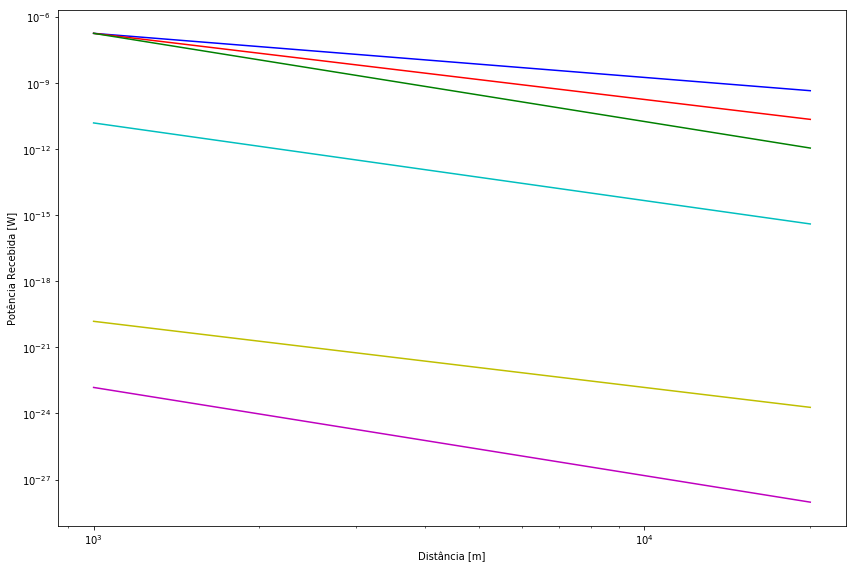

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

ax.loglog(d, Pr_tarefa31, 'b-', d, Pr_tarefa32_n3, 'r-', d, Pr_tarefa32_n4, 'g-', d, Pr_tarefa33, 'c-', d, Pr_tarefa34_n3, 'y-', d, Pr_tarefa34_n4, 'm-')

#ax.loglog(d, Pr_tarefa31, 'b-', label="Espaço Livre")

plt.xlabel("Distância [m]")
plt.ylabel("Potência Recebida [W]")

fig.tight_layout()
plt.show()

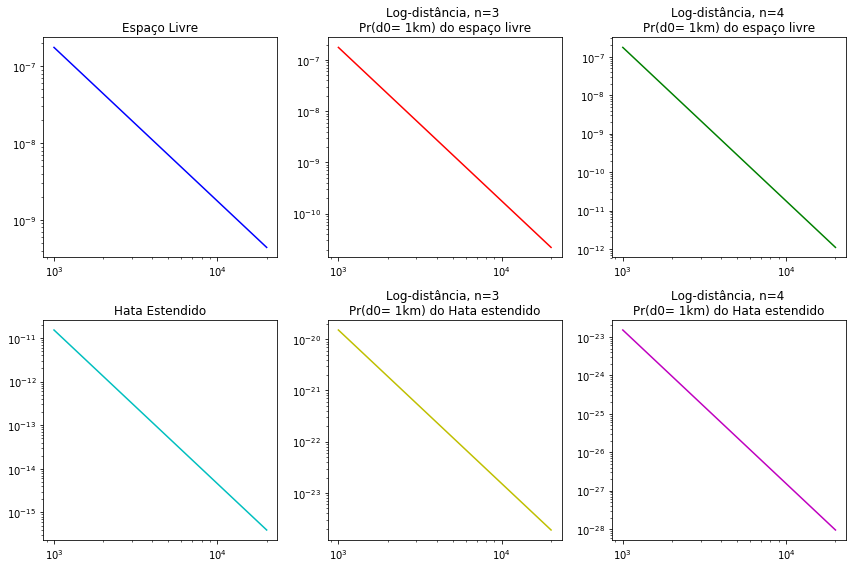

In [26]:
fig, ax = plt.subplots(2,3, figsize=(12,8))

ax[0][0].loglog(d, Pr_tarefa31, 'b-')
ax[0][0].set_title("Espaço Livre")

ax[0][1].loglog(d, Pr_tarefa32_n3, 'r-')
ax[0][1].set_title("Log-distância, n=3 \nPr(d0= 1km) do espaço livre")

ax[0][2].loglog(d, Pr_tarefa32_n4, 'g-')
ax[0][2].set_title("Log-distância, n=4 \nPr(d0= 1km) do espaço livre")

ax[1][0].loglog(d, Pr_tarefa33, 'c-')
ax[1][0].set_title("Hata Estendido")

ax[1][1].loglog(d, Pr_tarefa34_n3, 'y-')
ax[1][1].set_title("Log-distância, n=3 \nPr(d0= 1km) do Hata estendido")

ax[1][2].loglog(d, Pr_tarefa34_n4, 'm-')
ax[1][2].set_title("Log-distância, n=4 \nPr(d0= 1km) do Hata estendido")


fig.tight_layout()
plt.show()